In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/df_listo_para_segmentar.csv',sep=';')

df

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,CUT Destino Turistico,Destino Turistico,...,Anio,CUT Mes,Mes,Viajes Ocasionales,CUT Temporada,Temporada,PIB Region Origen,PIB Region Destino,Norte a Sur Origen,Norte a Sur Destino
0,1101,Iquique,11,Iquique,1,Tarapacá,1402,Camiña,0,Camiña,...,2019,1,enero,109,1,Alta,1061.580205,1061.580205,2,2
1,1101,Iquique,11,Iquique,1,Tarapacá,1403,Colchane,1,Colchane - P.N. Volcán Isluga,...,2019,1,enero,298,1,Alta,1061.580205,1061.580205,2,2
2,1101,Iquique,11,Iquique,1,Tarapacá,1404,Huara,2,Resto región Tarapacá,...,2019,1,enero,2594,1,Alta,1061.580205,1061.580205,2,2
3,1101,Iquique,11,Iquique,1,Tarapacá,1405,Pica,3,Pica,...,2019,1,enero,4138,1,Alta,1061.580205,1061.580205,2,2
4,1101,Iquique,11,Iquique,1,Tarapacá,2101,Antofagasta,4,Antofagasta,...,2019,1,enero,2071,1,Alta,1061.580205,3724.530431,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952619,16305,San Nicolás,163,Punilla,16,Ñuble,16203,Coelemu,87,Valle del Itata,...,2023,12,diciembre,17,1,Alta,833.567298,833.567298,10,10
2952620,16305,San Nicolás,163,Punilla,16,Ñuble,16207,Treguaco,83,Resto región Ñuble,...,2023,12,diciembre,44,1,Alta,833.567298,833.567298,10,10
2952621,16305,San Nicolás,163,Punilla,16,Ñuble,16302,Coihueco,83,Resto región Ñuble,...,2023,12,diciembre,108,1,Alta,833.567298,833.567298,10,10
2952622,16305,San Nicolás,163,Punilla,16,Ñuble,16303,Ñiquén,83,Resto región Ñuble,...,2023,12,diciembre,47,1,Alta,833.567298,833.567298,10,10


In [3]:
df.shape

(2952624, 24)

In [4]:
# Elimina las columnas 'Destino Turístico' y 'CUT Destino Turístico'
df = df.drop(columns=['Destino Turistico', 'CUT Destino Turistico','Norte a Sur Origen', 'Norte a Sur Destino'])

In [5]:
total_combinaciones_viajes = df.groupby(['CUT Comuna Origen', 'Comuna Origen', 'CUT Provincia Origen',
       'Provincia Origen', 'CUT Region Origen', 'Region Origen',
       'CUT Comuna Destino', 'Comuna Destino',
       'CUT Provincia Destino', 'Provincia Destino',
       'CUT Region Destino', 'Region Destino', 'Anio', 'CUT Mes', 'Mes',
       'CUT Temporada', 'Temporada', 'PIB Region Origen',
       'PIB Region Destino'])['Viajes Ocasionales'].sum().reset_index()
total_combinaciones_viajes.sort_values(by='Viajes Ocasionales')

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,CUT Temporada,Temporada,PIB Region Origen,PIB Region Destino,Viajes Ocasionales
68637,2103,Sierra Gorda,21,Antofagasta,2,Antofagasta,8105,Hualqui,81,Concepción,8,Biobío,2023,10,octubre,0,Baja,4225.898588,3253.026645,1
107317,2302,María Elena,23,Tocopilla,2,Antofagasta,4203,Los Vilos,42,Choapa,4,Coquimbo,2023,2,febrero,1,Alta,3806.672045,1567.639415,1
107318,2302,María Elena,23,Tocopilla,2,Antofagasta,4203,Los Vilos,42,Choapa,4,Coquimbo,2023,3,marzo,0,Baja,3806.672045,1567.639415,1
863943,6304,Lolol,63,Colchagua,6,Libertador Gral. Bernardo O'Higgins,9101,Temuco,91,Cautín,9,La Araucanía,2023,10,octubre,0,Baja,2151.774533,1507.696999,1
863945,6304,Lolol,63,Colchagua,6,Libertador Gral. Bernardo O'Higgins,9101,Temuco,91,Cautín,9,La Araucanía,2023,12,diciembre,1,Alta,2151.774533,1507.696999,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521997,9101,Temuco,91,Cautín,9,La Araucanía,9120,Villarrica,91,Cautín,9,La Araucanía,2020,2,febrero,1,Alta,1396.263059,1396.263059,16959
611593,6101,Rancagua,61,Cachapoal,6,Libertador Gral. Bernardo O'Higgins,6201,Pichilemu,62,Cardenal Caro,6,Libertador Gral. Bernardo O'Higgins,2024,2,febrero,1,Alta,2250.842471,2250.842471,16987
2452207,13201,Puente Alto,132,Cordillera,13,Metropolitana de Santiago,5604,El Quisco,56,San Antonio,5,Valparaíso,2020,2,febrero,1,Alta,19171.861138,3393.913572,17340
2452273,13201,Puente Alto,132,Cordillera,13,Metropolitana de Santiago,5605,El Tabo,56,San Antonio,5,Valparaíso,2020,2,febrero,1,Alta,19171.861138,3393.913572,17375


In [6]:
total_combinaciones_viajes.duplicated().sum()

np.int64(0)

In [7]:
total_combinaciones_viajes.describe()

,CUT Comuna Origen,CUT Provincia Origen,CUT Region Origen,CUT Comuna Destino,CUT Provincia Destino,CUT Region Destino,Anio,CUT Mes,CUT Temporada,PIB Region Origen,PIB Region Destino,Viajes Ocasionales
count,2.952624e+06,2.952624e+06,2.952624e+06,2.952624e+06,2.952624e+06,2.952624e+06,2.952624e+06,2.952624e+06,2.952624e+06,2.952624e+06,2.952624e+06,2.952624e+06
mean,9.252812e+03,9.246212e+01,9.026856e+00,9.194516e+03,9.188172e+01,8.970835e+00,2.021311e+03,6.312101e+00,3.509397e-01,6.752792e+03,5.770869e+03,5.737242e+01
std,3.774158e+03,3.772225e+01,3.802146e+00,3.765241e+03,3.763625e+01,3.795342e+00,1.541107e+00,3.446936e+00,4.772642e-01,8.051928e+03,7.519412e+03,2.221494e+02
min,1.101000e+03,1.100000e+01,1.000000e+00,1.101000e+03,1.100000e+01,1.000000e+00,2.019000e+03,1.000000e+00,0.000000e+00,2.697575e+02,2.697575e+02,1.000000e+00
25%,6.113000e+03,6.100000e+01,6.000000e+00,6.115000e+03,6.100000e+01,6.000000e+00,2.020000e+03,3.000000e+00,0.000000e+00,1.567639e+03,1.485615e+03,6.000000e+00
50%,8.307000e+03,8.300000e+01,8.000000e+00,8.314000e+03,8.300000e+01,8.000000e+00,2.021000e+03,6.000000e+00,0.000000e+00,2.312617e+03,2.011499e+03,1.300000e+01
75%,1.311800e+04,1.310000e+02,1.300000e+01,1.311400e+04,1.310000e+02,1.300000e+01,2.023000e+03,9.000000e+00,1.000000e+00,1.651618e+04,3.718329e+03,3.700000e+01
max,1.630500e+04,1.630000e+02,1.600000e+01,1.630500e+04,1.630000e+02,1.600000e+01,2.024000e+03,1.200000e+01,1.000000e+00,2.261309e+04,2.261309e+04,2.185900e+04


In [8]:
# Análisis Outliers Viajes Ocasionales

# Función análisis RIC
def analisis_ric(columna,df):
    estadisticas = df[columna].describe()
    ric = estadisticas['75%'] - estadisticas['25%']
    lim_sup = estadisticas['75%'] + 1.5*ric
    lim_inf = estadisticas['25%'] - 1.5*ric
    print(f'\nRango Intercuratílico: {ric}')
    print(f'Límite superior: {lim_sup} \nLímite inferior: {lim_inf}')
    
col_a_analizar = 'Viajes Ocasionales'

analisis_ric(col_a_analizar,total_combinaciones_viajes)

print('\n',total_combinaciones_viajes[total_combinaciones_viajes[col_a_analizar]>=83].count())
print('\n',total_combinaciones_viajes[total_combinaciones_viajes[col_a_analizar]<0].count())


Rango Intercuratílico: 31.0
Límite superior: 83.5 
Límite inferior: -40.5

 CUT Comuna Origen        380288
Comuna Origen            380288
CUT Provincia Origen     380288
Provincia Origen         380288
CUT Region Origen        380288
Region Origen            380288
CUT Comuna Destino       380288
Comuna Destino           380288
CUT Provincia Destino    380288
Provincia Destino        380288
CUT Region Destino       380288
Region Destino           380288
Anio                     380288
CUT Mes                  380288
Mes                      380288
CUT Temporada            380288
Temporada                380288
PIB Region Origen        380288
PIB Region Destino       380288
Viajes Ocasionales       380288
dtype: int64

 CUT Comuna Origen        0
Comuna Origen            0
CUT Provincia Origen     0
Provincia Origen         0
CUT Region Origen        0
Region Origen            0
CUT Comuna Destino       0
Comuna Destino           0
CUT Provincia Destino    0
Provincia Destino        

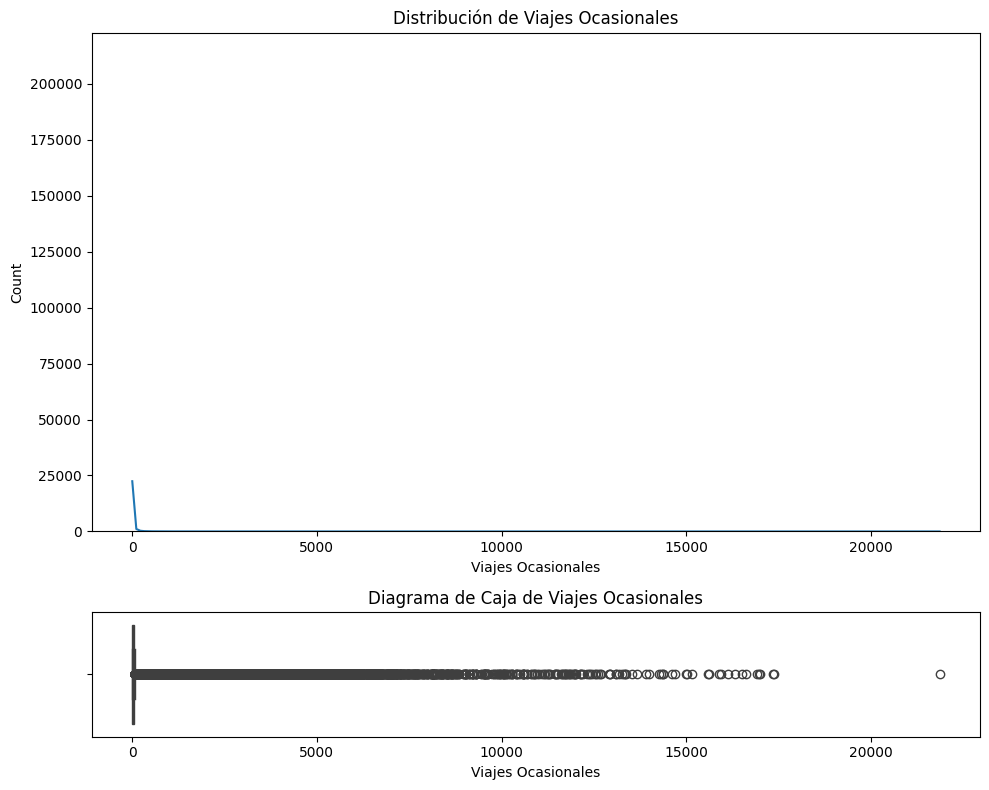

In [9]:
# Se observa la distribución de los datos y sus outliers

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

sns.histplot(data=total_combinaciones_viajes, x="Viajes Ocasionales", kde=True, ax=ax_hist)
ax_hist.set_title("Distribución de Viajes Ocasionales")

sns.boxplot(data=total_combinaciones_viajes, x="Viajes Ocasionales", ax=ax_box)
ax_box.set_title("Diagrama de Caja de Viajes Ocasionales")

plt.tight_layout()
plt.show()


Se hacen pruebas para conseguir la mejor segmentación segun la frecuencia de viajes ocasionales segun combinación Origen-Destino

In [13]:
total_combinaciones_viajes_prueba = total_combinaciones_viajes[(total_combinaciones_viajes['Viajes Ocasionales']<=83)]
total_combinaciones_viajes_prueba.sort_values(by='Viajes Ocasionales')

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,CUT Temporada,Temporada,PIB Region Origen,PIB Region Destino,Viajes Ocasionales
97824,2203,San Pedro de Atacama,22,El Loa,2,Antofagasta,5401,La Ligua,54,Petorca,5,Valparaíso,2019,7,julio,0,Baja,4099.144469,3373.370139,1
2759658,14108,Panguipulli,141,Valdivia,14,Los Ríos,13604,Padre Hurtado,136,Talagante,13,Metropolitana de Santiago,2023,1,enero,1,Alta,666.270990,20971.773521,1
39083,1405,Pica,14,Tamarugal,1,Tarapacá,13501,Melipilla,135,Melipilla,13,Metropolitana de Santiago,2019,12,diciembre,1,Alta,1202.639412,20162.501443,1
2851416,16104,El Carmen,161,Diguillin,16,Ñuble,13104,Conchalí,131,Santiago,13,Metropolitana de Santiago,2021,1,enero,1,Alta,757.162360,19269.377857,1
2851418,16104,El Carmen,161,Diguillin,16,Ñuble,13104,Conchalí,131,Santiago,13,Metropolitana de Santiago,2021,3,marzo,0,Baja,757.162360,19269.377857,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619370,6101,Rancagua,61,Cachapoal,6,Libertador Gral. Bernardo O'Higgins,10202,Ancud,102,Chiloé,10,Los Lagos,2021,9,septiembre,0,Baja,1773.097533,1626.038920,83
2430775,13131,San Ramón,131,Santiago,13,Metropolitana de Santiago,14106,Mariquina,141,Valdivia,14,Los Ríos,2020,2,febrero,1,Alta,19171.861138,625.804333,83
526962,5701,San Felipe,57,San Felipe de Aconcagua,5,Valparaíso,13402,Buin,134,Maipo,13,Metropolitana de Santiago,2023,1,enero,1,Alta,3686.928447,20971.773521,83
56553,2101,Antofagasta,21,Antofagasta,2,Antofagasta,13404,Paine,134,Maipo,13,Metropolitana de Santiago,2022,10,octubre,1,Alta,4177.589301,21796.205815,83


In [14]:
total_combinaciones_viajes_prueba.describe()

,CUT Comuna Origen,CUT Provincia Origen,CUT Region Origen,CUT Comuna Destino,CUT Provincia Destino,CUT Region Destino,Anio,CUT Mes,CUT Temporada,PIB Region Origen,PIB Region Destino,Viajes Ocasionales
count,2.576614e+06,2.576614e+06,2.576614e+06,2.576614e+06,2.576614e+06,2.576614e+06,2.576614e+06,2.576614e+06,2.576614e+06,2.576614e+06,2.576614e+06,2.576614e+06
mean,9.137535e+03,9.131076e+01,8.907348e+00,9.281980e+03,9.275522e+01,9.058723e+00,2.021286e+03,6.384353e+00,3.323428e-01,6.226730e+03,5.842389e+03,1.763638e+01
std,3.767172e+03,3.765445e+01,3.795205e+00,3.757305e+03,3.755704e+01,3.787182e+00,1.523792e+00,3.391792e+00,4.710532e-01,7.729826e+03,7.587284e+03,1.795265e+01
min,1.101000e+03,1.100000e+01,1.000000e+00,1.101000e+03,1.100000e+01,1.000000e+00,2.019000e+03,1.000000e+00,0.000000e+00,2.697575e+02,2.697575e+02,1.000000e+00
25%,6.111000e+03,6.100000e+01,6.000000e+00,6.201000e+03,6.200000e+01,6.000000e+00,2.020000e+03,4.000000e+00,0.000000e+00,1.532298e+03,1.478858e+03,5.000000e+00
50%,8.303000e+03,8.300000e+01,8.000000e+00,9.103000e+03,9.100000e+01,9.000000e+00,2.021000e+03,6.000000e+00,0.000000e+00,2.219180e+03,2.000542e+03,1.000000e+01
75%,1.311500e+04,1.310000e+02,1.300000e+01,1.311600e+04,1.310000e+02,1.300000e+01,2.023000e+03,9.000000e+00,1.000000e+00,3.878092e+03,3.718329e+03,2.400000e+01
max,1.630500e+04,1.630000e+02,1.600000e+01,1.630500e+04,1.630000e+02,1.600000e+01,2.024000e+03,1.200000e+01,1.000000e+00,2.261309e+04,2.261309e+04,8.300000e+01


In [15]:
col_a_analizar = 'Viajes Ocasionales'

analisis_ric(col_a_analizar,total_combinaciones_viajes_prueba)

print('\n',total_combinaciones_viajes_prueba[total_combinaciones_viajes_prueba[col_a_analizar]>=50].count())
print('\n',total_combinaciones_viajes_prueba[total_combinaciones_viajes_prueba[col_a_analizar]<0].count())


Rango Intercuratílico: 19.0
Límite superior: 52.5 
Límite inferior: -23.5

 CUT Comuna Origen        212056
Comuna Origen            212056
CUT Provincia Origen     212056
Provincia Origen         212056
CUT Region Origen        212056
Region Origen            212056
CUT Comuna Destino       212056
Comuna Destino           212056
CUT Provincia Destino    212056
Provincia Destino        212056
CUT Region Destino       212056
Region Destino           212056
Anio                     212056
CUT Mes                  212056
Mes                      212056
CUT Temporada            212056
Temporada                212056
PIB Region Origen        212056
PIB Region Destino       212056
Viajes Ocasionales       212056
dtype: int64

 CUT Comuna Origen        0
Comuna Origen            0
CUT Provincia Origen     0
Provincia Origen         0
CUT Region Origen        0
Region Origen            0
CUT Comuna Destino       0
Comuna Destino           0
CUT Provincia Destino    0
Provincia Destino        

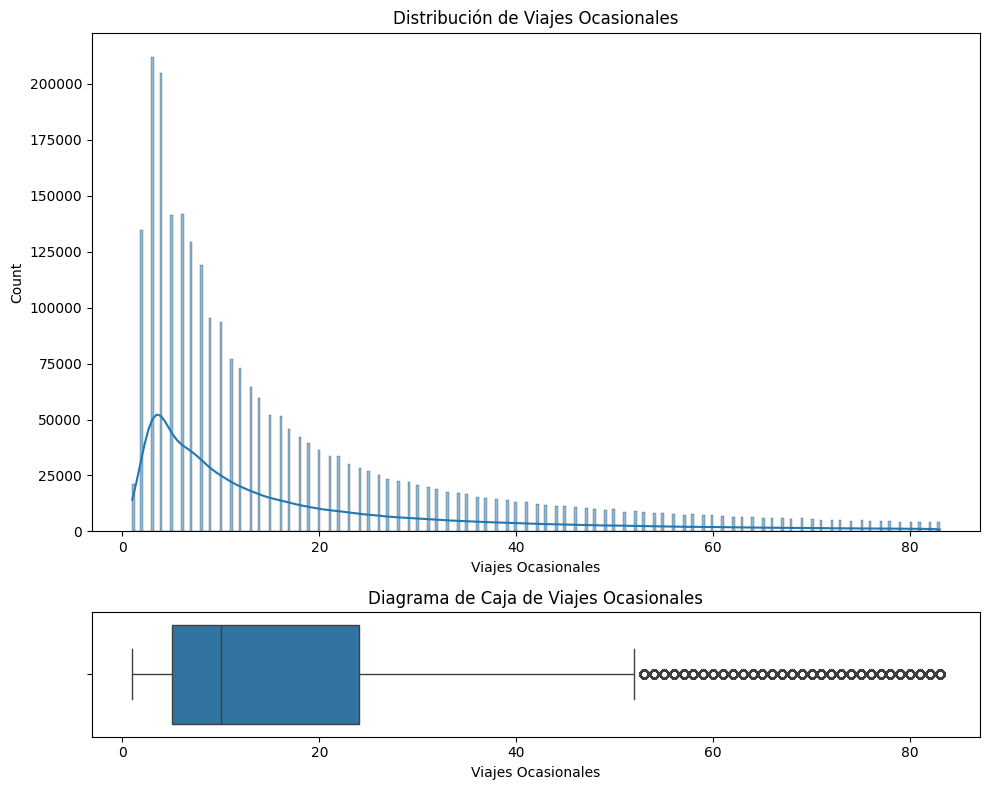

In [25]:
# Análisis segmento 0 - 82

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Histograma para 'Viajes Ocasionales' con ajuste de escala en el eje X
sns.histplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", kde=True, ax=ax_hist)
ax_hist.set_title("Distribución de Viajes Ocasionales")

# Diagrama de caja para 'Viajes Ocasionales'
sns.boxplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", ax=ax_box)
ax_box.set_title("Diagrama de Caja de Viajes Ocasionales")

plt.tight_layout()
plt.show()


In [50]:
# Se Reduce el segmento a 0 - 34
total_combinaciones_viajes_prueba = total_combinaciones_viajes[(total_combinaciones_viajes['Viajes Ocasionales']<=34)]
total_combinaciones_viajes_prueba.sort_values(by='Viajes Ocasionales')

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,CUT Temporada,Temporada,PIB Region Origen,PIB Region Destino,Viajes Ocasionales
2772089,14202,Futrono,142,Ranco,14,Los Ríos,8313,Yumbel,83,Biobío,8,Biobío,2023,12,diciembre,1,Alta,716.073318,3253.026645,1
100078,2203,San Pedro de Atacama,22,El Loa,2,Antofagasta,13107,Huechuraba,131,Santiago,13,Metropolitana de Santiago,2022,5,mayo,0,Baja,3840.022305,21322.040771,1
100079,2203,San Pedro de Atacama,22,El Loa,2,Antofagasta,13107,Huechuraba,131,Santiago,13,Metropolitana de Santiago,2022,6,junio,0,Baja,3840.022305,21322.040771,1
100080,2203,San Pedro de Atacama,22,El Loa,2,Antofagasta,13107,Huechuraba,131,Santiago,13,Metropolitana de Santiago,2022,7,julio,0,Baja,3908.559895,20903.243505,1
100081,2203,San Pedro de Atacama,22,El Loa,2,Antofagasta,13107,Huechuraba,131,Santiago,13,Metropolitana de Santiago,2022,8,agosto,0,Baja,3908.559895,20903.243505,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870918,10303,Purranque,103,Osorno,10,Los Lagos,14204,Río Bueno,142,Ranco,14,Los Ríos,2019,5,mayo,0,Baja,1625.636891,625.486000,34
398879,5402,Cabildo,54,Petorca,5,Valparaíso,13124,Pudahuel,131,Santiago,13,Metropolitana de Santiago,2021,12,diciembre,1,Alta,3857.853015,22613.088769,34
398888,5402,Cabildo,54,Petorca,5,Valparaíso,13124,Pudahuel,131,Santiago,13,Metropolitana de Santiago,2022,9,septiembre,1,Alta,3622.003385,20903.243505,34
2817302,16101,Chillán,161,Diguillin,16,Ñuble,8307,Negrete,83,Biobío,8,Biobío,2023,3,marzo,0,Baja,812.578681,3088.736562,34


In [51]:
col_a_analizar = 'Viajes Ocasionales'

analisis_ric(col_a_analizar,total_combinaciones_viajes_prueba)

print('\n',total_combinaciones_viajes_prueba[total_combinaciones_viajes_prueba[col_a_analizar]>34].count())
print('\n',total_combinaciones_viajes_prueba[total_combinaciones_viajes_prueba[col_a_analizar]<0].count())


Rango Intercuratílico: 12.0
Límite superior: 34.0 
Límite inferior: -14.0

 CUT Comuna Origen        0
Comuna Origen            0
CUT Provincia Origen     0
Provincia Origen         0
CUT Region Origen        0
Region Origen            0
CUT Comuna Destino       0
Comuna Destino           0
CUT Provincia Destino    0
Provincia Destino        0
CUT Region Destino       0
Region Destino           0
Anio                     0
CUT Mes                  0
Mes                      0
CUT Temporada            0
Temporada                0
PIB Region Origen        0
PIB Region Destino       0
Viajes Ocasionales       0
dtype: int64

 CUT Comuna Origen        0
Comuna Origen            0
CUT Provincia Origen     0
Provincia Origen         0
CUT Region Origen        0
Region Origen            0
CUT Comuna Destino       0
Comuna Destino           0
CUT Provincia Destino    0
Provincia Destino        0
CUT Region Destino       0
Region Destino           0
Anio                     0
CUT Mes          

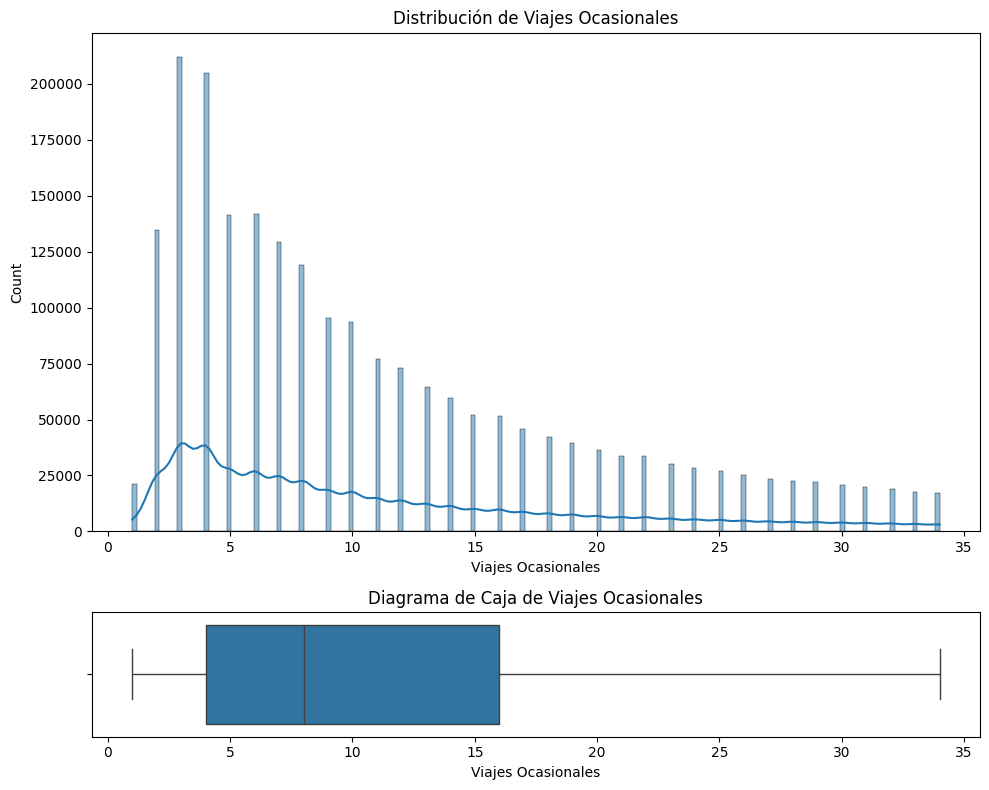

In [52]:
# Análisis segmento 0 - 34

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Histograma para 'Viajes Ocasionales' con ajuste de escala en el eje X
sns.histplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", kde=True, ax=ax_hist)
ax_hist.set_title("Distribución de Viajes Ocasionales")

# Diagrama de caja para 'Viajes Ocasionales'
sns.boxplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", ax=ax_box)
ax_box.set_title("Diagrama de Caja de Viajes Ocasionales")

plt.tight_layout()
plt.show()


In [29]:
total_combinaciones_viajes_prueba.to_csv('../data/processed/df_segmento_0-34.csv', sep=';', index=False)

In [31]:
# Segmento de 34-160 
total_combinaciones_viajes_prueba = total_combinaciones_viajes[(total_combinaciones_viajes['Viajes Ocasionales']>=35)&(total_combinaciones_viajes['Viajes Ocasionales']<=160)]
total_combinaciones_viajes_prueba.sort_values(by='Viajes Ocasionales')

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,CUT Temporada,Temporada,PIB Region Origen,PIB Region Destino,Viajes Ocasionales
593046,5804,Villa Alemana,58,Marga Marga,5,Valparaíso,4104,La Higuera,41,Elqui,4,Coquimbo,2021,7,julio,0,Baja,3510.305434,1523.827879,35
2708905,14101,Valdivia,141,Valdivia,14,Los Ríos,13128,Renca,131,Santiago,13,Metropolitana de Santiago,2024,2,febrero,1,Alta,698.000305,21124.552771,35
1435910,8303,Cabrero,83,Biobío,8,Biobío,8109,Santa Juana,81,Concepción,8,Biobío,2019,9,septiembre,0,Baja,2802.509087,2802.509087,35
1865782,10302,Puerto Octay,103,Osorno,10,Los Lagos,14204,Río Bueno,142,Ranco,14,Los Ríos,2023,5,mayo,0,Baja,1772.316605,652.352720,35
2340711,13125,Quilicura,131,Santiago,13,Metropolitana de Santiago,14203,Lago Ranco,142,Ranco,14,Los Ríos,2023,10,octubre,0,Baja,22032.121888,716.073318,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415519,8301,Los Angeles,83,Biobío,8,Biobío,6110,Mostazal,61,Cachapoal,6,Libertador Gral. Bernardo O'Higgins,2022,6,junio,0,Baja,3073.574436,1938.551162,160
2681223,13605,Peñaflor,136,Talagante,13,Metropolitana de Santiago,5102,Casablanca,51,Valparaíso,5,Valparaíso,2022,10,octubre,0,Baja,21796.205815,3878.091800,160
1217700,8102,Coronel,81,Concepción,8,Biobío,1101,Iquique,11,Iquique,1,Tarapacá,2019,1,enero,1,Alta,2756.752875,1061.580205,160
1418394,8301,Los Angeles,83,Biobío,8,Biobío,7401,Linares,74,Linares,7,Maule,2022,7,julio,0,Baja,2918.276976,1668.118941,160


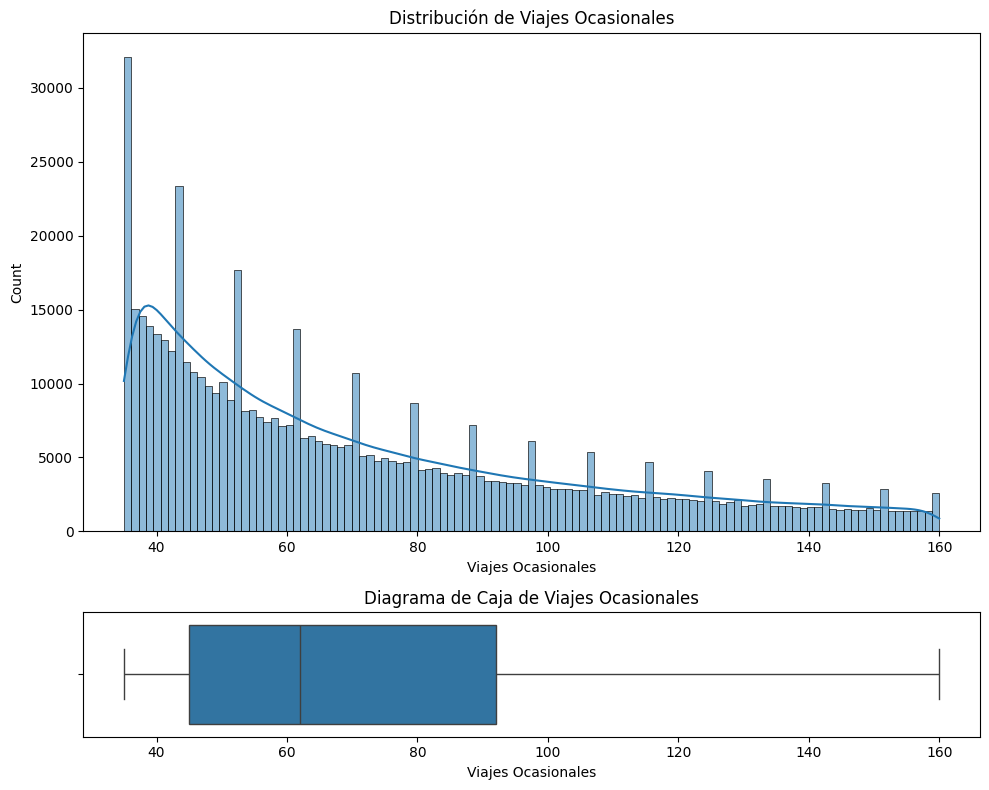

In [32]:
# Analisis segmento 35-160

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Histograma para 'Viajes Ocasionales' con ajuste de escala en el eje X
sns.histplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", kde=True, ax=ax_hist)
ax_hist.set_title("Distribución de Viajes Ocasionales")

# Diagrama de caja para 'Viajes Ocasionales'
sns.boxplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", ax=ax_box)
ax_box.set_title("Diagrama de Caja de Viajes Ocasionales")

plt.tight_layout()
plt.show()

In [33]:
total_combinaciones_viajes_prueba.to_csv('../data/processed/df_segmento_34-160.csv', sep=';', index=False)

In [34]:
# Segmento de 161 - 598
total_combinaciones_viajes_prueba = total_combinaciones_viajes[(total_combinaciones_viajes['Viajes Ocasionales']>160)&(total_combinaciones_viajes['Viajes Ocasionales']<=598)]
total_combinaciones_viajes_prueba.sort_values(by='Viajes Ocasionales')

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,CUT Temporada,Temporada,PIB Region Origen,PIB Region Destino,Viajes Ocasionales
2634498,13601,Talagante,136,Talagante,13,Metropolitana de Santiago,5606,Santo Domingo,56,San Antonio,5,Valparaíso,2022,1,enero,1,Alta,20767.208879,3672.086732,161
1043126,7301,Curicó,73,Curicó,7,Maule,13404,Paine,134,Maipo,13,Metropolitana de Santiago,2024,3,marzo,0,Baja,2076.192842,21124.552771,161
2417409,13130,San Miguel,131,Santiago,13,Metropolitana de Santiago,13602,El Monte,136,Talagante,13,Metropolitana de Santiago,2021,10,octubre,1,Alta,22613.088769,22613.088769,161
2417477,13130,San Miguel,131,Santiago,13,Metropolitana de Santiago,14101,Valdivia,141,Valdivia,14,Los Ríos,2021,12,diciembre,0,Baja,22613.088769,725.602828,161
2418137,13130,San Miguel,131,Santiago,13,Metropolitana de Santiago,15101,Arica,151,Arica,15,Arica y Parinacota,2024,6,junio,0,Baja,21484.966717,403.393797,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2359615,13127,Recoleta,131,Santiago,13,Metropolitana de Santiago,5102,Casablanca,51,Valparaíso,5,Valparaíso,2024,2,febrero,1,Alta,21124.552771,3755.356023,598
1859196,10301,Osorno,103,Osorno,10,Los Lagos,13114,Las Condes,131,Santiago,13,Metropolitana de Santiago,2022,7,julio,0,Baja,1661.273426,20903.243505,598
2145982,13114,Las Condes,131,Santiago,13,Metropolitana de Santiago,2101,Antofagasta,21,Antofagasta,2,Antofagasta,2019,11,noviembre,0,Baja,20162.501443,4279.561800,598
2152630,13114,Las Condes,131,Santiago,13,Metropolitana de Santiago,6310,Santa Cruz,63,Colchagua,6,Libertador Gral. Bernardo O'Higgins,2022,11,noviembre,0,Baja,21796.205815,2290.216218,598


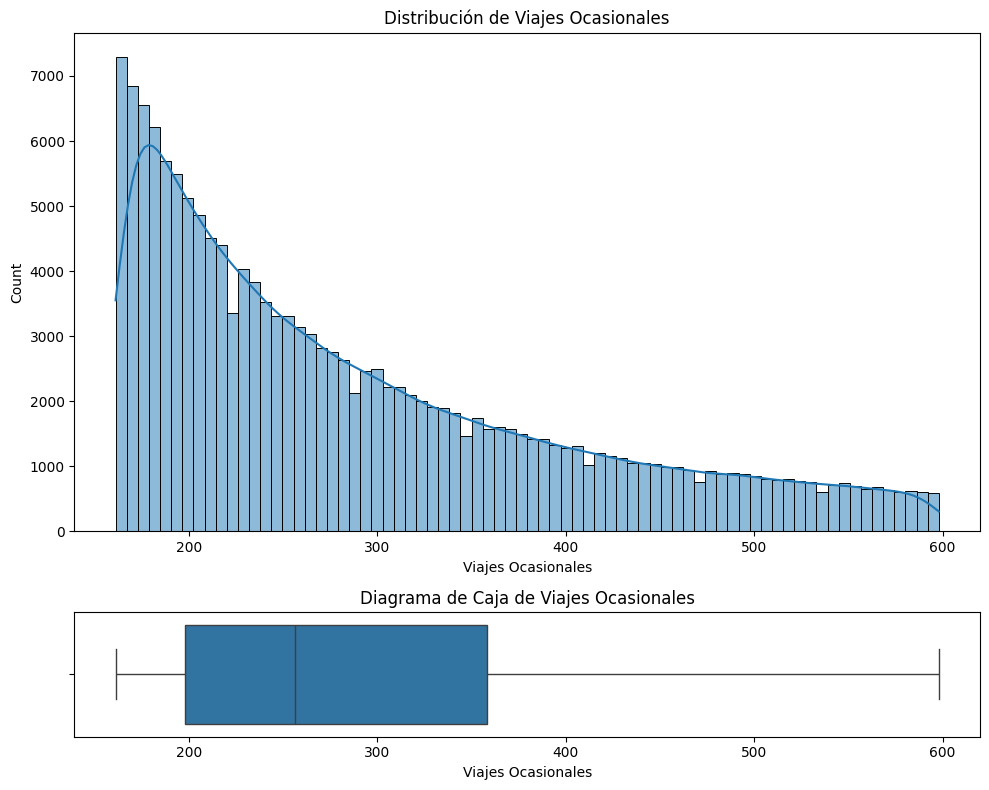

In [35]:
# Analisis segmento 161-598

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Histograma para 'Viajes Ocasionales' con ajuste de escala en el eje X
sns.histplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", kde=True, ax=ax_hist)
ax_hist.set_title("Distribución de Viajes Ocasionales")

# Diagrama de caja para 'Viajes Ocasionales'
sns.boxplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", ax=ax_box)
ax_box.set_title("Diagrama de Caja de Viajes Ocasionales")

plt.tight_layout()
plt.show()

In [35]:
total_combinaciones_viajes_prueba.to_csv('../data/processed/df_segmento_161-598.csv', sep=';', index=False)

In [36]:
# Segmento 598 - 1800
total_combinaciones_viajes_prueba = total_combinaciones_viajes[(total_combinaciones_viajes['Viajes Ocasionales']>598)&(total_combinaciones_viajes['Viajes Ocasionales']<=1800)]
total_combinaciones_viajes_prueba.sort_values(by='Viajes Ocasionales')

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,CUT Temporada,Temporada,PIB Region Origen,PIB Region Destino,Viajes Ocasionales
2436883,13132,Vitacura,131,Santiago,13,Metropolitana de Santiago,6107,Las Cabras,61,Cachapoal,6,Libertador Gral. Bernardo O'Higgins,2021,2,febrero,1,Alta,19269.377857,2226.046860,599
986280,7109,San Clemente,71,Talca,7,Maule,7203,Pelluhue,72,Cauquenes,7,Maule,2024,1,enero,1,Alta,2076.192842,2076.192842,599
2452000,13201,Puente Alto,132,Cordillera,13,Metropolitana de Santiago,5601,San Antonio,56,San Antonio,5,Valparaíso,2019,5,mayo,0,Baja,20336.524262,3453.769432,599
2179002,13115,Lo Barnechea,131,Santiago,13,Metropolitana de Santiago,13501,Melipilla,135,Melipilla,13,Metropolitana de Santiago,2022,1,enero,1,Alta,20767.208879,20767.208879,599
1729431,9211,Victoria,92,Malleco,9,La Araucanía,9101,Temuco,91,Cautín,9,La Araucanía,2022,4,abril,0,Baja,1470.525668,1470.525668,599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166751,13115,Lo Barnechea,131,Santiago,13,Metropolitana de Santiago,5109,Viña del Mar,51,Valparaíso,5,Valparaíso,2022,2,febrero,1,Alta,20767.208879,3672.086732,1800
611585,6101,Rancagua,61,Cachapoal,6,Libertador Gral. Bernardo O'Higgins,6201,Pichilemu,62,Cardenal Caro,6,Libertador Gral. Bernardo O'Higgins,2023,6,junio,0,Baja,1934.448455,1934.448455,1800
2532306,13401,San Bernardo,134,Maipo,13,Metropolitana de Santiago,5101,Valparaíso,51,Valparaíso,5,Valparaíso,2024,1,enero,1,Alta,21124.552771,3755.356023,1800
2209278,13118,Macul,131,Santiago,13,Metropolitana de Santiago,5604,El Quisco,56,San Antonio,5,Valparaíso,2023,1,enero,1,Alta,20971.773521,3686.928447,1800


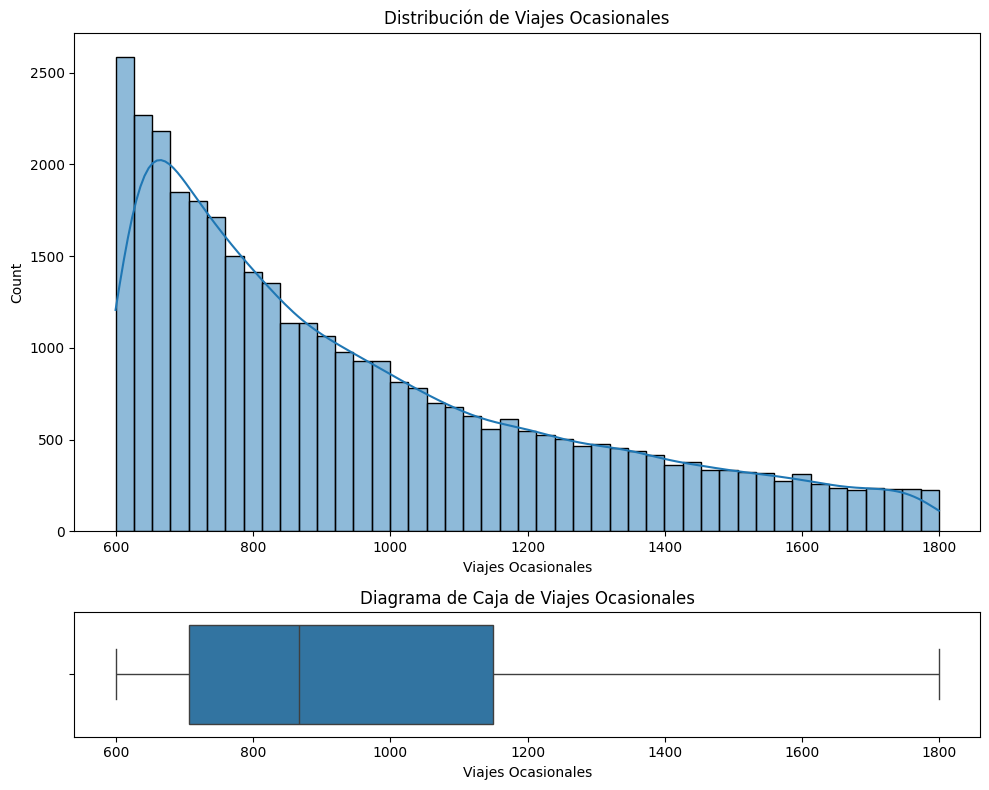

In [37]:
# Analisis Segmento 598 - 1800

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Histograma para 'Viajes Ocasionales' con ajuste de escala en el eje X
sns.histplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", kde=True, ax=ax_hist)
ax_hist.set_title("Distribución de Viajes Ocasionales")

# Diagrama de caja para 'Viajes Ocasionales'
sns.boxplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", ax=ax_box)
ax_box.set_title("Diagrama de Caja de Viajes Ocasionales")

plt.tight_layout()
plt.show()

In [38]:
total_combinaciones_viajes_prueba.to_csv('../data/processed/df_segmento_598-1800.csv', sep=';', index=False)

In [39]:
# Segmento 1851-4500
total_combinaciones_viajes_prueba = total_combinaciones_viajes[(total_combinaciones_viajes['Viajes Ocasionales']>1850)&(total_combinaciones_viajes['Viajes Ocasionales']<=4500)]
total_combinaciones_viajes_prueba.sort_values(by='Viajes Ocasionales')

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,CUT Temporada,Temporada,PIB Region Origen,PIB Region Destino,Viajes Ocasionales
2453461,13201,Puente Alto,132,Cordillera,13,Metropolitana de Santiago,6107,Las Cabras,61,Cachapoal,6,Libertador Gral. Bernardo O'Higgins,2020,2,febrero,1,Alta,19171.861138,2152.846770,1851
1749312,10101,Puerto Montt,101,Llanquihue,10,Los Lagos,13101,Santiago,131,Santiago,13,Metropolitana de Santiago,2019,1,enero,1,Alta,1597.748195,19454.387194,1851
2292133,13123,Providencia,131,Santiago,13,Metropolitana de Santiago,5105,Puchuncaví,51,Valparaíso,5,Valparaíso,2021,2,febrero,1,Alta,19269.377857,3316.215818,1851
2206987,13118,Macul,131,Santiago,13,Metropolitana de Santiago,4102,Coquimbo,41,Elqui,4,Coquimbo,2022,2,febrero,1,Alta,20767.208879,1480.508246,1851
1745593,10101,Puerto Montt,101,Llanquihue,10,Los Lagos,9115,Pucón,91,Cautín,9,La Araucanía,2021,2,febrero,1,Alta,1532.679722,1390.495024,1851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223252,13119,Maipú,131,Santiago,13,Metropolitana de Santiago,4101,La Serena,41,Elqui,4,Coquimbo,2024,1,enero,1,Alta,21124.552771,1600.553436,4488
2224211,13119,Maipú,131,Santiago,13,Metropolitana de Santiago,5101,Valparaíso,51,Valparaíso,5,Valparaíso,2021,12,diciembre,1,Alta,22613.088769,3857.853015,4490
1857163,10301,Osorno,103,Osorno,10,Los Lagos,10302,Puerto Octay,103,Osorno,10,Los Lagos,2024,2,febrero,1,Alta,1817.695528,1817.695528,4496
2225775,13119,Maipú,131,Santiago,13,Metropolitana de Santiago,5604,El Quisco,56,San Antonio,5,Valparaíso,2022,4,abril,0,Baja,21322.040771,3718.329046,4496


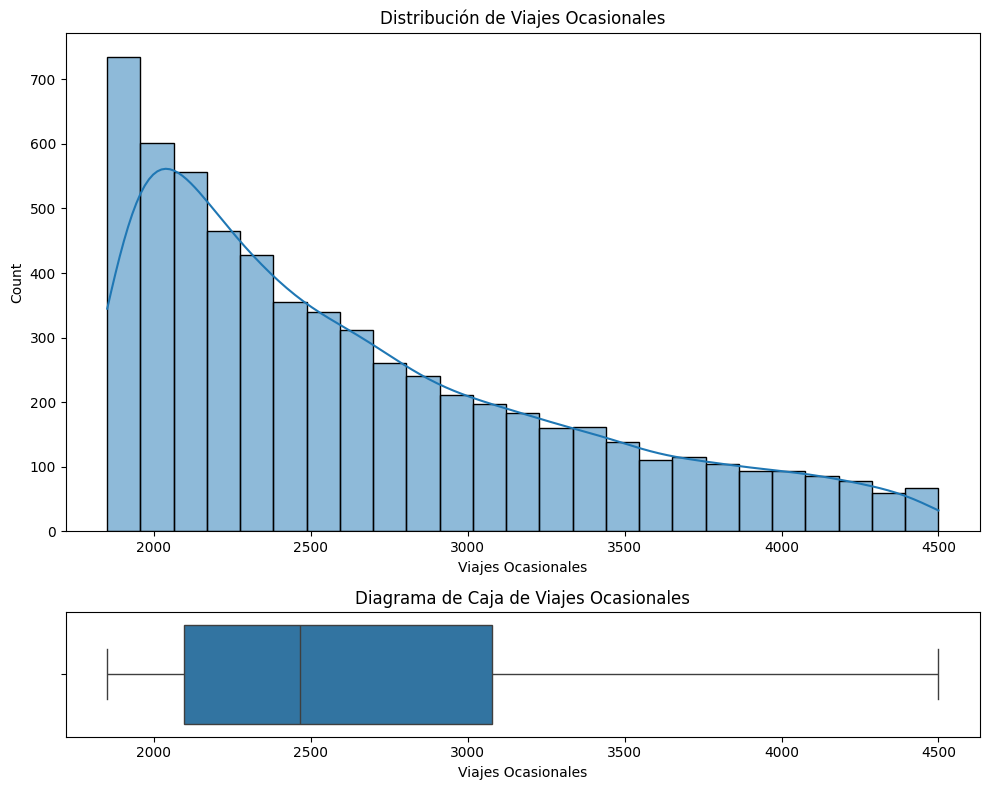

In [40]:
# Analisis  segmento 1851-4500

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Histograma para 'Viajes Ocasionales' con ajuste de escala en el eje X
sns.histplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", kde=True, ax=ax_hist)
ax_hist.set_title("Distribución de Viajes Ocasionales")

# Diagrama de caja para 'Viajes Ocasionales'
sns.boxplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", ax=ax_box)
ax_box.set_title("Diagrama de Caja de Viajes Ocasionales")

plt.tight_layout()
plt.show()

In [41]:
total_combinaciones_viajes_prueba.to_csv('../data/processed/df_segmento_1851-4500.csv', sep=';', index=False)

In [42]:
# Segmento 4501-9000
total_combinaciones_viajes_prueba = total_combinaciones_viajes[(total_combinaciones_viajes['Viajes Ocasionales']>4500)&(total_combinaciones_viajes['Viajes Ocasionales']<=9000)]
total_combinaciones_viajes_prueba.sort_values(by='Viajes Ocasionales')

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,CUT Temporada,Temporada,PIB Region Origen,PIB Region Destino,Viajes Ocasionales
2148378,13114,Las Condes,131,Santiago,13,Metropolitana de Santiago,5109,Viña del Mar,51,Valparaíso,5,Valparaíso,2019,7,julio,0,Baja,19636.899081,3373.370139,4507
164414,4101,La Serena,41,Elqui,4,Coquimbo,4106,Vicuña,41,Elqui,4,Coquimbo,2022,9,septiembre,0,Baja,1485.615197,1485.615197,4507
180548,4102,Coquimbo,41,Elqui,4,Coquimbo,4106,Vicuña,41,Elqui,4,Coquimbo,2024,3,marzo,0,Baja,1600.553436,1600.553436,4508
78233,2201,Calama,22,El Loa,2,Antofagasta,2101,Antofagasta,21,Antofagasta,2,Antofagasta,2023,12,diciembre,1,Alta,4225.898588,4225.898588,4509
609253,6101,Rancagua,61,Cachapoal,6,Libertador Gral. Bernardo O'Higgins,5109,Viña del Mar,51,Valparaíso,5,Valparaíso,2024,2,febrero,1,Alta,2250.842471,3755.356023,4510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269953,5101,Valparaíso,51,Valparaíso,5,Valparaíso,5803,Olmué,58,Marga Marga,5,Valparaíso,2023,2,febrero,1,Alta,3686.928447,3686.928447,8858
2816281,16101,Chillán,161,Diguillin,16,Ñuble,8111,Tomé,81,Concepción,8,Biobío,2020,2,febrero,1,Alta,759.399509,2757.086230,8959
2148433,13114,Las Condes,131,Santiago,13,Metropolitana de Santiago,5109,Viña del Mar,51,Valparaíso,5,Valparaíso,2024,2,febrero,1,Alta,21124.552771,3755.356023,8979
2223205,13119,Maipú,131,Santiago,13,Metropolitana de Santiago,4101,La Serena,41,Elqui,4,Coquimbo,2020,2,febrero,1,Alta,19171.861138,1506.684729,8985


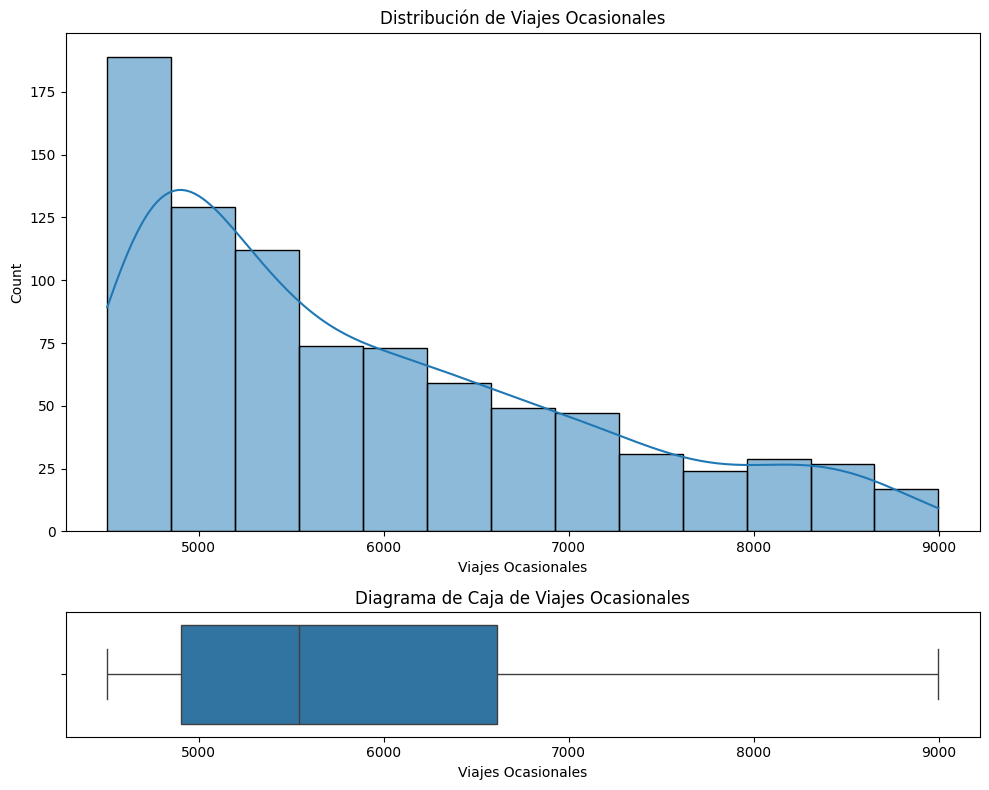

In [43]:
# Analisis Segmento 4501-9000

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Histograma para 'Viajes Ocasionales' con ajuste de escala en el eje X
sns.histplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", kde=True, ax=ax_hist)
ax_hist.set_title("Distribución de Viajes Ocasionales")

# Diagrama de caja para 'Viajes Ocasionales'
sns.boxplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", ax=ax_box)
ax_box.set_title("Diagrama de Caja de Viajes Ocasionales")

plt.tight_layout()
plt.show()

In [44]:
total_combinaciones_viajes_prueba.to_csv('../data/processed/df_segmento_4501-9000.csv', sep=';', index=False)

In [45]:
# Segmento >9001
total_combinaciones_viajes_prueba = total_combinaciones_viajes[(total_combinaciones_viajes['Viajes Ocasionales']>9000)]
total_combinaciones_viajes_prueba.sort_values(by='Viajes Ocasionales')

,CUT Comuna Origen,Comuna Origen,CUT Provincia Origen,Provincia Origen,CUT Region Origen,Region Origen,CUT Comuna Destino,Comuna Destino,CUT Provincia Destino,Provincia Destino,CUT Region Destino,Region Destino,Anio,CUT Mes,Mes,CUT Temporada,Temporada,PIB Region Origen,PIB Region Destino,Viajes Ocasionales
110112,3101,Copiapó,31,Copiapó,3,Atacama,3102,Caldera,31,Copiapó,3,Atacama,2023,1,enero,1,Alta,983.429140,983.429140,9024
1033872,7301,Curicó,73,Curicó,7,Maule,7303,Licantén,73,Curicó,7,Maule,2019,1,enero,1,Alta,1924.638707,1924.638707,9026
2452219,13201,Puente Alto,132,Cordillera,13,Metropolitana de Santiago,5604,El Quisco,56,San Antonio,5,Valparaíso,2021,2,febrero,1,Alta,19269.377857,3316.215818,9043
2452141,13201,Puente Alto,132,Cordillera,13,Metropolitana de Santiago,5603,Cartagena,56,San Antonio,5,Valparaíso,2020,2,febrero,1,Alta,19171.861138,3393.913572,9045
2225827,13119,Maipú,131,Santiago,13,Metropolitana de Santiago,5605,El Tabo,56,San Antonio,5,Valparaíso,2021,2,febrero,1,Alta,19269.377857,3316.215818,9110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521997,9101,Temuco,91,Cautín,9,La Araucanía,9120,Villarrica,91,Cautín,9,La Araucanía,2020,2,febrero,1,Alta,1396.263059,1396.263059,16959
611593,6101,Rancagua,61,Cachapoal,6,Libertador Gral. Bernardo O'Higgins,6201,Pichilemu,62,Cardenal Caro,6,Libertador Gral. Bernardo O'Higgins,2024,2,febrero,1,Alta,2250.842471,2250.842471,16987
2452207,13201,Puente Alto,132,Cordillera,13,Metropolitana de Santiago,5604,El Quisco,56,San Antonio,5,Valparaíso,2020,2,febrero,1,Alta,19171.861138,3393.913572,17340
2452273,13201,Puente Alto,132,Cordillera,13,Metropolitana de Santiago,5605,El Tabo,56,San Antonio,5,Valparaíso,2020,2,febrero,1,Alta,19171.861138,3393.913572,17375


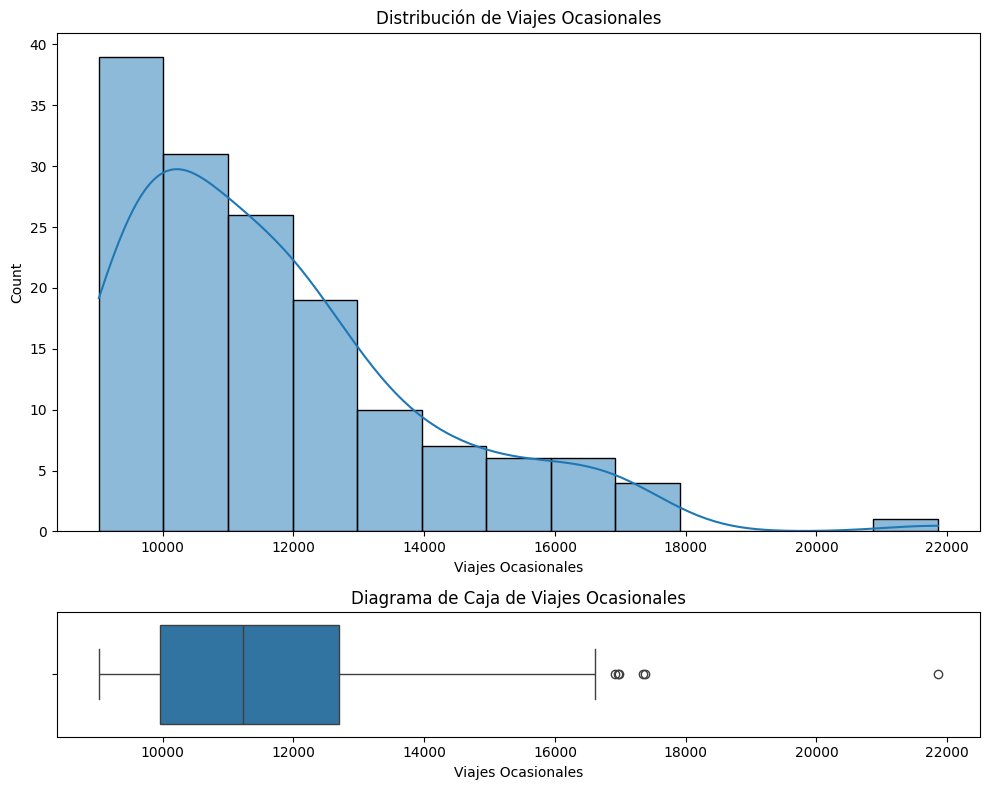

In [46]:
# Analisis univariante numérico Viajes Ocasionales

fig, (ax_hist, ax_box) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [4, 1]})

# Histograma para 'Viajes Ocasionales' con ajuste de escala en el eje X
sns.histplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", kde=True, ax=ax_hist)
ax_hist.set_title("Distribución de Viajes Ocasionales")

# Diagrama de caja para 'Viajes Ocasionales'
sns.boxplot(data=total_combinaciones_viajes_prueba, x="Viajes Ocasionales", ax=ax_box)
ax_box.set_title("Diagrama de Caja de Viajes Ocasionales")

plt.tight_layout()
plt.show()

In [47]:
total_combinaciones_viajes_prueba.to_csv('../data/processed/df_segmento_>9001.csv', sep=';', index=False)